source : https://www.kaggle.com/code/mikoajfish99/apples-vs-tomatoes-cnn/notebook

# Importing Main Libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

# EDA

### Displaying Sample Images

In [ ]:
pth = '/content/drive/MyDrive/MSIB - Prak. Visual Recognition/Praktek 7/dataset/'

image dimensions: (227, 222)


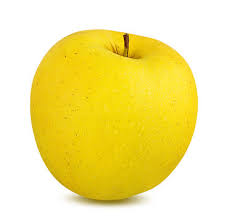

In [ ]:
# Pillow for image processing
from PIL import Image

# Getting sample apple image
apples_image_path = pth+'train/apples/img_p3_98.jpeg'
apples_image = Image.open(apples_image_path)
print("image dimensions:",apples_image.size)
apples_image

image dimensions: (277, 182)


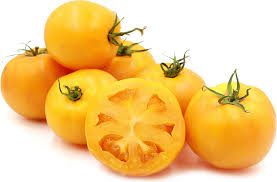

In [ ]:
# Getting sample tomatoes image
tomatoes_image_path = pth+'train/tomatoes/img_p3_81.jpeg'
tomatoes_image = Image.open(tomatoes_image_path)
print("image dimensions:", tomatoes_image.size)
tomatoes_image

### Getting dimensions of all images to check if there are any anomalies in the images data as well as to know the range of shapes and colors

In [ ]:
# Getting train and test directories
train_dir = pth+"train"
test_dir = pth+"test"

In [ ]:
from itertools import chain
from matplotlib import pyplot as plt

# Creating set of dimensions
unique_dimensions = set()
unique_modes = set()

# Iterating through all images
for subdir in chain(os.listdir(train_dir), os.listdir(test_dir)):
    subdir_path = os.path.join(train_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        image = Image.open(file_path)
        # Adding shape and mode of give image to sets
        unique_dimensions.add(image.size[0])
        unique_dimensions.add(image.size[1])
        unique_modes.add(image.mode)

print("unique modes:", unique_modes)
print("unique dimensions:", unique_dimensions)

unique modes: {'P', 'RGB'}
unique dimensions: {100, 118, 133, 143, 150, 153, 159, 162, 163, 164, 165, 167, 168, 171, 172, 173, 175, 176, 177, 178, 180, 181, 182, 183, 184, 186, 187, 191, 192, 193, 194, 195, 196, 198, 201, 202, 204, 206, 207, 208, 212, 213, 215, 216, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 233, 234, 237, 242, 243, 245, 248, 249, 250, 251, 255, 258, 259, 260, 261, 262, 264, 269, 270, 271, 275, 276, 277, 278, 281, 283, 284, 288, 290, 291, 294, 299, 300, 301, 305, 307, 310, 311, 318, 329, 335}


#### All images are at diffrent sizes they will have to be resized into same dimension later

In [ ]:
# Setting the dimensions for images to be resized to
DIMENSIONS = [100, 100]

### For curiosity displaying all images with modes == "P"

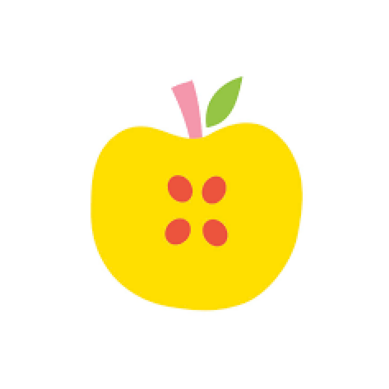

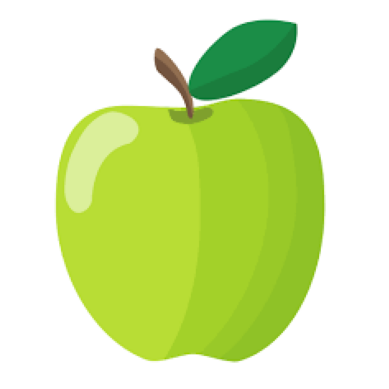

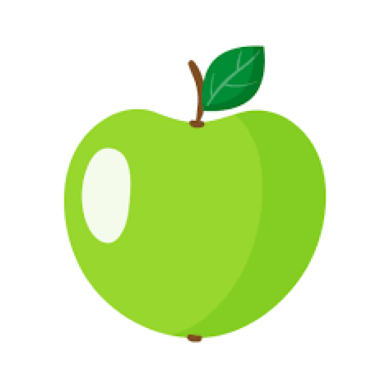

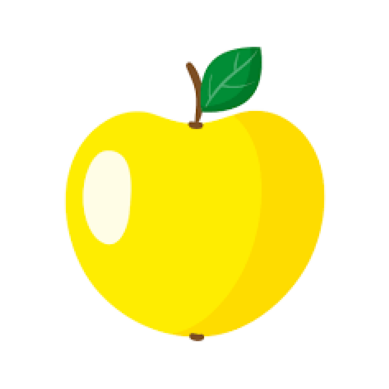

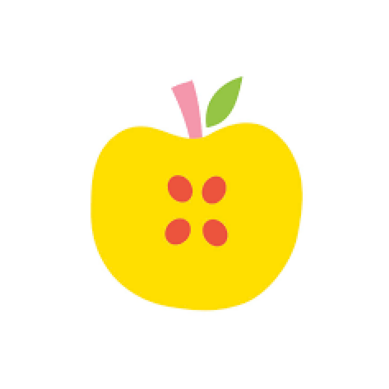

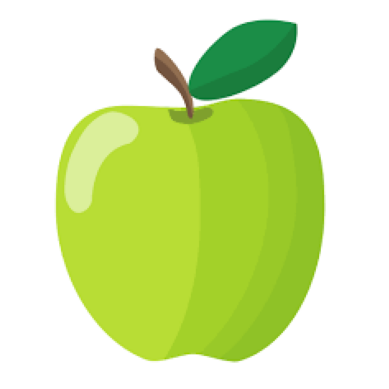

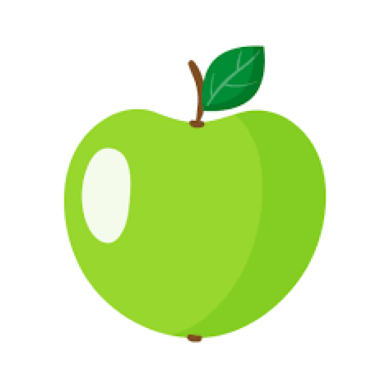

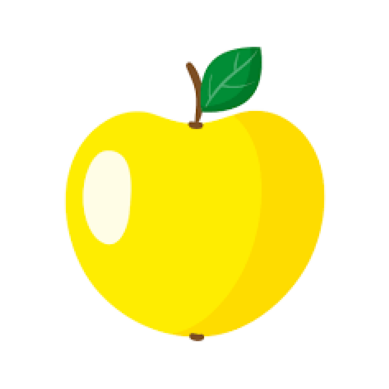

In [ ]:
# Iterating through all images
for subdir in chain(os.listdir(train_dir), os.listdir(test_dir)):
    subdir_path = os.path.join(train_dir, subdir)
    for filename in os.listdir(subdir_path):
        file_path = os.path.join(subdir_path, filename)
        image = Image.open(file_path)

        # Displaying images
        if image.mode == "P":
            plt.axis("off")
            plt.imshow(image)
            plt.show()

# Creating CNN model

In [ ]:
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Activation, Dropout
from keras import backend
import tensorflow as tf
import keras

# Creating simple model
def simple_model():
    # Clearning any model memory
    backend.clear_session()

    # Creating Sequential model
    model = Sequential()

    # Adding convolution layers
    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', activation="relu", input_shape=(*DIMENSIONS, 3)))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform', activation="relu"))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform', activation="relu"))
    model.add(MaxPooling2D(2, 2))

    # Flattening the output and adding Dense layers
    model.add(Flatten())
    model.add(Dense(512, activation="relu", kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(256, activation="relu", kernel_initializer='he_uniform'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

In [ ]:
# Creating advanced model
def advanced_model():
    # Clearning any model memory
    backend.clear_session()

    # Creating Sequential model
    model = Sequential()

    # Adding convolution layers
    model.add(Conv2D(32, (3,3), kernel_initializer='he_uniform', input_shape=(*DIMENSIONS, 3)))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(64, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(MaxPooling2D(2, 2))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(BatchNormalization())
    model.add(Activation('relu'))
    model.add(Conv2D(128, (3,3), kernel_initializer='he_uniform'))
    model.add(MaxPooling2D(2, 2))

    # Flattening the output and adding Dense layers
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(256))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(1, activation='sigmoid'))

    model.summary()

    return model

### Creating Image Generator Pipeline

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# Applying data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.25,
      height_shift_range=0.25,
      shear_range=0.3,
      zoom_range=0.3,
      horizontal_flip=True,
      brightness_range=(0.8, 1.2),
      fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
# Flow from directory images using train_datagen and valid_datagen generators

train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=tuple(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary') # Since we use binary_crossentropy loss, we need binary labels

valid_generator = valid_datagen.flow_from_directory(
        test_dir,  # This is the source directory for training images
        target_size=tuple(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary')

Found 294 images belonging to 2 classes.
Found 97 images belonging to 2 classes.


### Compiling And Training The Model

In [ ]:
# Creating new model
model = simple_model()
# model = advanced_model()

# Parameters
BATCH_SIZE = 64
EPOCHS = 120

model.compile(loss='binary_crossentropy',
              optimizer="Adam",
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 21, 21, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 10, 10, 128)      0

In [ ]:
# Training the model
history = model.fit(
      train_generator,
      validation_data=valid_generator,
      batch_size=BATCH_SIZE,
      epochs=EPOCHS,
      callbacks=[tf.keras.callbacks.LearningRateScheduler(lambda epoch, lr: lr if epoch < 60 else lr * tf.math.exp(-0.05))],
      verbose=1)

Epoch 1/120
10/10 [==============================] - 31s 3s/step - loss: 3.0493 - accuracy: 0.4966 - val_loss: 0.6891 - val_accuracy: 0.5567 - lr: 0.0010
Epoch 2/120
10/10 [==============================] - 5s 503ms/step - loss: 0.7163 - accuracy: 0.5272 - val_loss: 0.6844 - val_accuracy: 0.4948 - lr: 0.0010
Epoch 3/120
10/10 [==============================] - 5s 522ms/step - loss: 0.6943 - accuracy: 0.5374 - val_loss: 0.6676 - val_accuracy: 0.4845 - lr: 0.0010
Epoch 4/120
10/10 [==============================] - 6s 556ms/step - loss: 0.6741 - accuracy: 0.5918 - val_loss: 0.6428 - val_accuracy: 0.6082 - lr: 0.0010
Epoch 5/120
10/10 [==============================] - 5s 500ms/step - loss: 0.6508 - accuracy: 0.6905 - val_loss: 0.5890 - val_accuracy: 0.6804 - lr: 0.0010
Epoch 6/120
10/10 [==============================] - 5s 506ms/step - loss: 0.6374 - accuracy: 0.6599 - val_loss: 0.6302 - val_accuracy: 0.6701 - lr: 0.0010
Epoch 7/120
10/10 [==============================] - 6s 645ms/step

# Testing CNN model

### Plotting Learning Curves

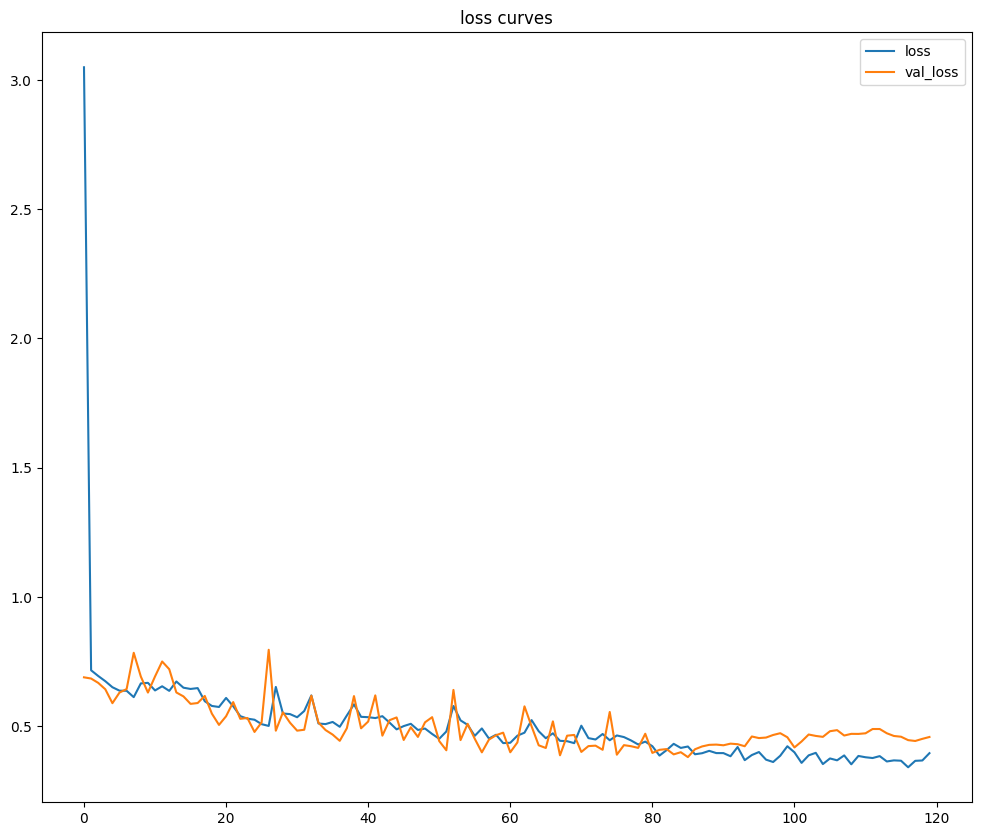

In [ ]:
import matplotlib.pyplot as plt

# Plotting loss curves
plt.figure(figsize=(12,10))
plt.title("loss curves")
plt.plot(history.history["loss"], label="loss")
plt.plot(history.history["val_loss"], label="val_loss")
plt.legend()

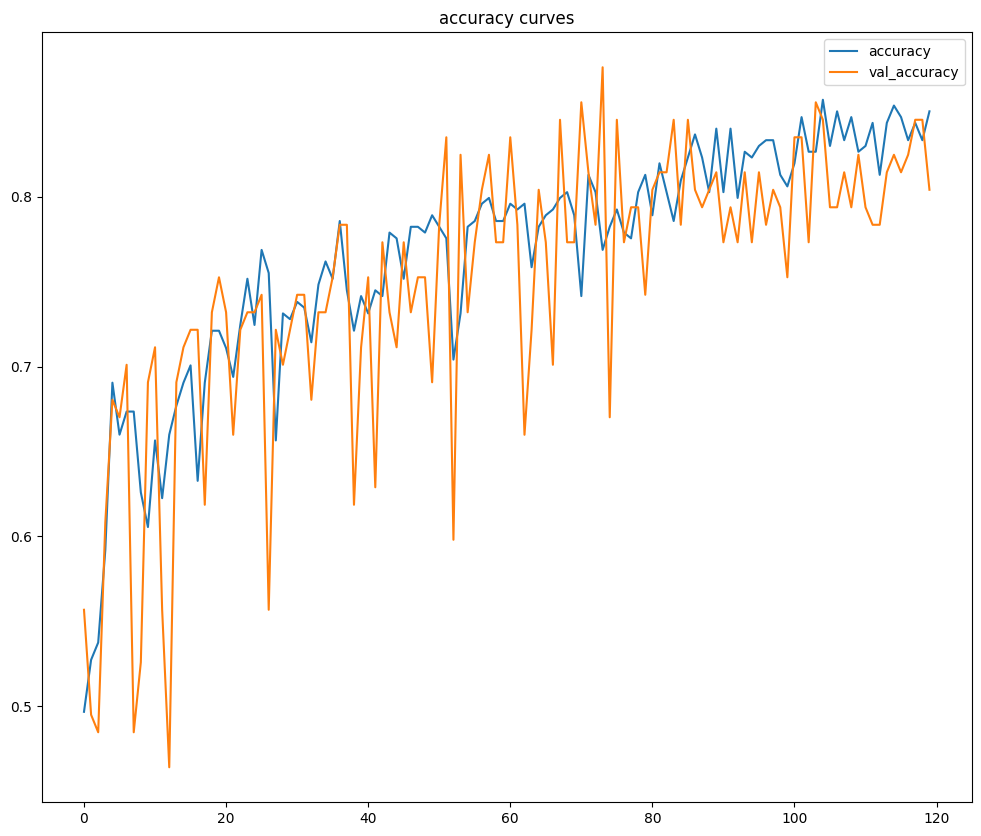

In [ ]:
# Plotting accuracy curves
plt.figure(figsize=(12,10))
plt.title("accuracy curves")
plt.plot(history.history["accuracy"], label="accuracy")
plt.plot(history.history["val_accuracy"], label="val_accuracy")
plt.legend()

### Displaying Confusion Matrix

In [ ]:
# Creating new generator for test data
test_generator = valid_datagen.flow_from_directory(
        test_dir,  # This is the source directory for test images
        target_size=(DIMENSIONS),  # All images will be resized to 100x100
        class_mode='binary',  # Since we use binary_crossentropy loss, we need binary labels
        shuffle=False)  # We don't want to shuffle the test data

# Predicting labels for all test images
y_pred = model.predict(test_generator)
y_pred[:10]

Found 97 images belonging to 2 classes.
4/4 [==============================] - 1s 91ms/step


array([[0.05264578],
       [0.03008353],
       [0.21792158],
       [0.05950268],
       [0.6141584 ],
       [0.00916634],
       [0.58014566],
       [0.2160166 ],
       [0.5034611 ],
       [0.41968298]], dtype=float32)

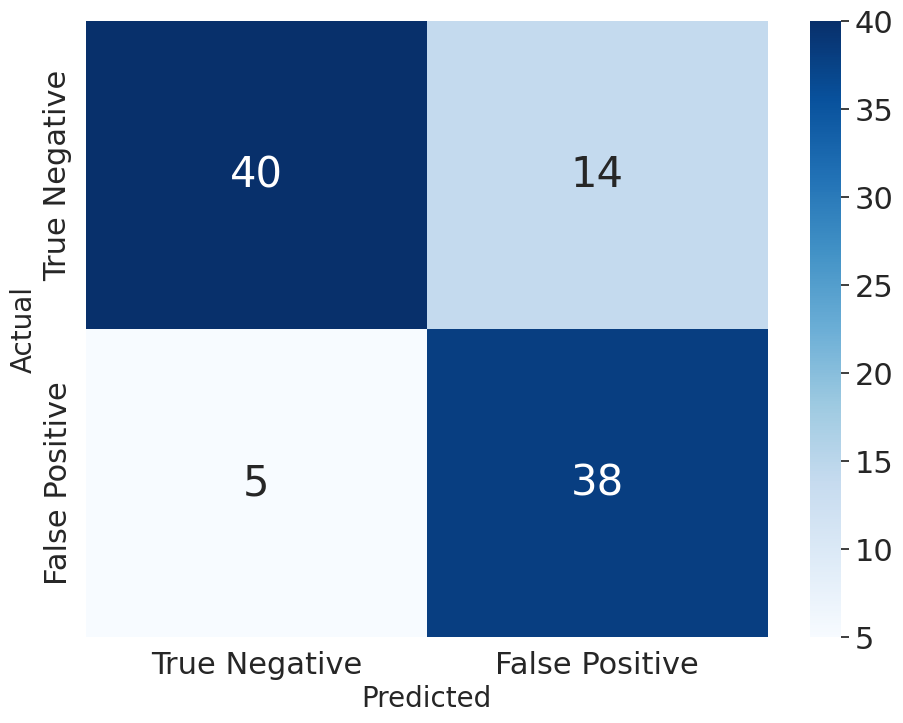

In [ ]:
from sklearn.metrics import confusion_matrix

# Getting the true labels for the test data
y_true = test_generator.labels

# Converting the predicted labels to binary labels
y_pred = np.round(y_pred)

# Calculating the confusion matrix
confusion_matrix = confusion_matrix(y_true, y_pred)

# Displaying the confusion matrix
import seaborn as sns
from seaborn import heatmap

plt.figure(figsize=(11,8))
sns.set(font_scale=2)

heatmap(confusion_matrix,
        annot=True,
        annot_kws={"size": 30},
        fmt='g',
        cmap='Blues',
        xticklabels=['True Negative', 'False Positive'],
        yticklabels=['True Negative', 'False Positive'])

plt.xlabel('Predicted', fontsize=20)
plt.ylabel('Actual', fontsize=20);

### Displaying those images that were wrongly classified

In [ ]:
# Getting indecies of wrongly classified images
misclassified_indices = np.where(y_true.reshape(-1,1) != y_pred)[0]

# Displaying all wrongly classified images
for i in misclassified_indices:
    image_path = test_generator.filepaths[i]
    image = plt.imread(image_path)
    plt.imshow(image)
    plt.axis("off")
    plt.show()